# ______________Temperature Forecast Project using ML ________________

Name : Radha Kulkarni                                                                                                           
Project Batch : DS2401

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:


For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')

In [3]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [4]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [5]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [6]:
#checking for shape of the data
df.shape

(7752, 25)

Dataset contains 7752 rows and 25 columns.

In [7]:
#checking for columns
df.columns.to_list()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Dataset contains one column of object datatype and remaining are of float datatype.Some null values may present.Need to convert datetype of column 'Date'.


In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.drop(columns=['Date'],inplace=True)

In [11]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Day                 float64
Month               float64
Year                float64
dtype: object

In [12]:
#chicking for dup9licate values
df.duplicated().sum()

0

In [13]:
#checking for unique values
df.nunique()

station               25
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
Day                   21
Month                 12
Year                   5
dtype: int64

In [14]:
#checking for value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("____________________________________________________________________________________________________________")

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64
____________________________________________________________________________________________________________
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64
____________________________________________________________________________________________________________
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64
__________________________________________________________________________________________________

We can observe that there is no nan value or whitespace are present in any column.

In [15]:
#checking for null values
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

All columns contains null values other then 'lat','lon','DEM','Slope','Solar radiation '.

<Axes: >

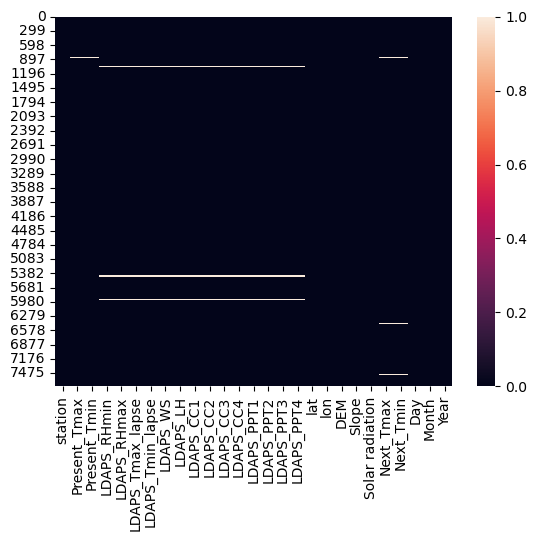

In [16]:
sns.heatmap(df.isnull())

In [17]:
((df.isnull().sum()/len(df))*100).sort_values(ascending = False)

LDAPS_PPT1          0.967492
LDAPS_LH            0.967492
LDAPS_PPT4          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT2          0.967492
LDAPS_CC4           0.967492
LDAPS_CC3           0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_WS            0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_RHmax         0.967492
LDAPS_RHmin         0.967492
Present_Tmax        0.902993
Present_Tmin        0.902993
Next_Tmax           0.348297
Next_Tmin           0.348297
Month               0.025800
Day                 0.025800
station             0.025800
Year                0.025800
Solar radiation     0.000000
Slope               0.000000
DEM                 0.000000
lon                 0.000000
lat                 0.000000
dtype: float64

# Handling Null values

In [18]:
df.fillna(0,inplace=True)

In [19]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

<Axes: >

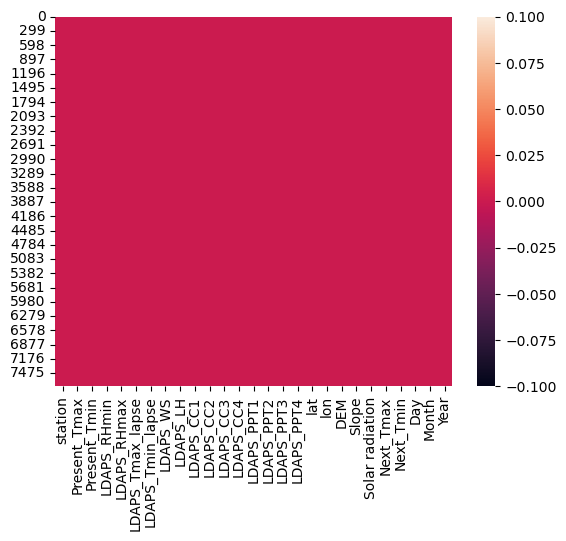

In [20]:
sns.heatmap(df.isnull())

# Stastical analysis

In [21]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     12.996646     29.499407     23.015338    56.210230    87.519784   
std       7.213660      4.083116      3.256071    15.618676    11.227876   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%       7.000000     27.700000     21.600000    45.735368    84.038809   
50%      13.000000     29.900000     23.400000    54.828714    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.326939         23.285106     7.029203    61.900288   
std            4.123757          3.277967     2.281613    34.120103   
min            0.000000          0.000000     0.000000   -13.603212   
25%           27.601014         22.032374     5.647741    36.776474   
50%           29.662273         23.735942     6.531345    56.487289   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat          lon          DEM        Slope  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.365206  ...    37.544722   126.991397    61.867972     1.257048   
std       0.263668  ...     0.050352     0.079435    54.279780     1.370444   
min       0.000000  ...    37.456200   126.826000    12.370000     0.098475   
25%       0.141643  ...    37.510200   126.937000    28.700000     0.271300   
50%       0.312156  ...    37.550700   126.995000    45.716000     0.618000   
75%       0.571696  ...    37.577600   127.042000    59.832400     1.767800   
max       0.967277  ...    37.645000   127.135000   212.335000     5.178230   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean       5341.502803    30.169440    22.852348    16.366744     7.078818   
std         429.158867     3.596114     2.827042     8.244461     2.240962   
min        4329.520508     0.000000     0.000000     0.000000     0.000000   
25%        4999.018555    28.200000    21.300000     8.000000     7.000000   
50%        5436.345215    30.500000    23.100000    16.000000     7.000000   
75%        5728.316406    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7752.000000  
mean   2014.480134  
std      32.394355  
min       0.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

1) Counts of all columns are same which shows absence of null values
2) There is no much difference between mean and median value which shows dataset is not skewed.
3)  Outliers may present in the columns 'LDAPS_RHmin','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM'.

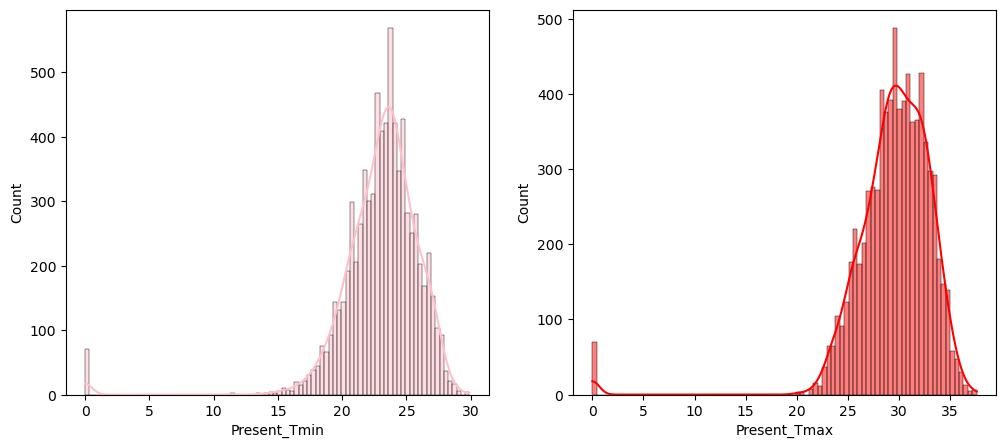

In [23]:
#visualizing present tmax and present t min
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmin'],kde=True,color='pink')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmax'],kde=True,color='red')
plt.show()

Present minimum temperature is in the range of 14 to 30.                                                                         
Present maximum temperature is in the range of 21 to 38.   

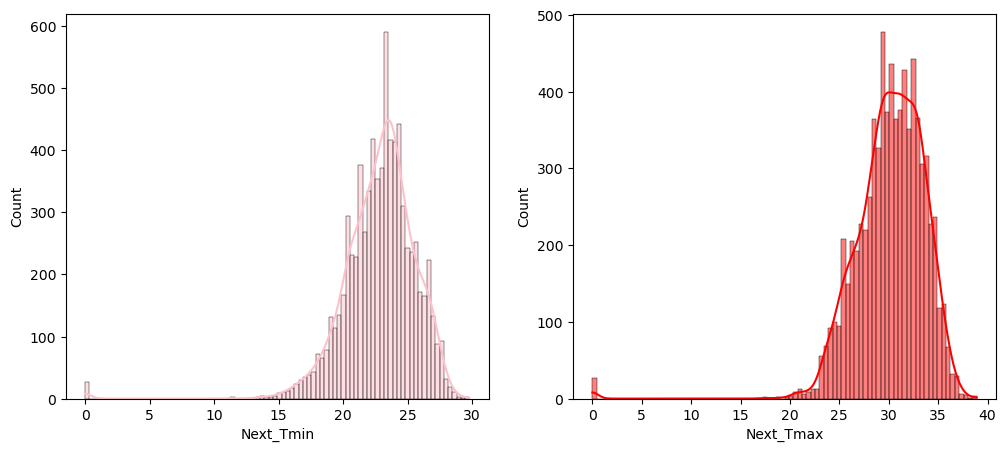

In [24]:
#visualizing next tmax and next t man
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmin'],kde=True,color='pink')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmax'],kde=True,color='red')
plt.show()

Next day minimum temperature is in the range of 14 to 30.                                                                       
Next day maximum temperature is in the range of 20 to 38.                                                                        

In [25]:
df1=df[['station',
              'Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse',
              'LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']]

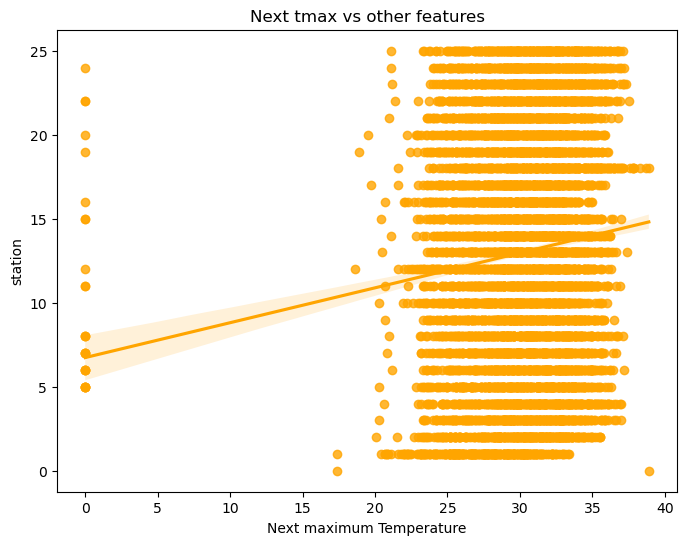

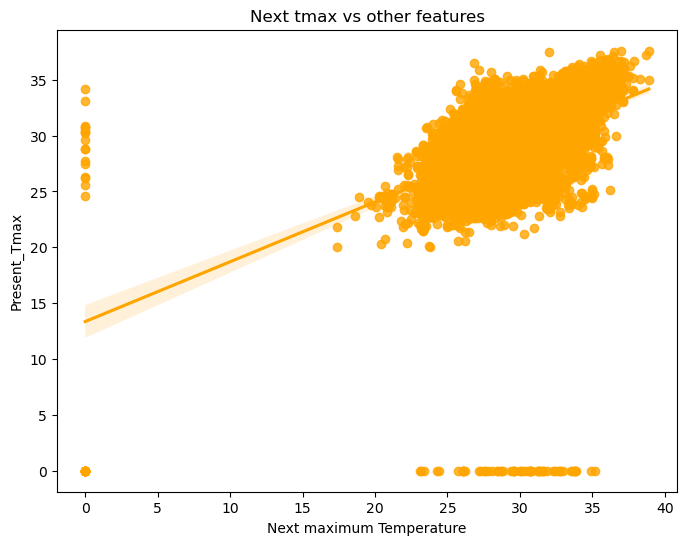

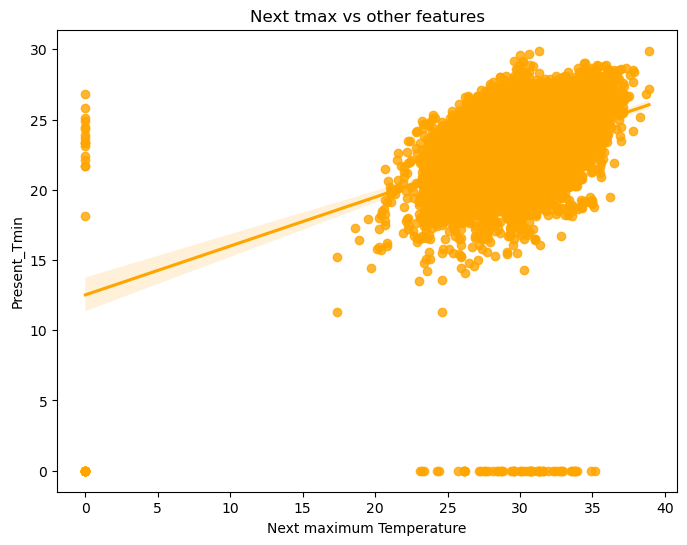

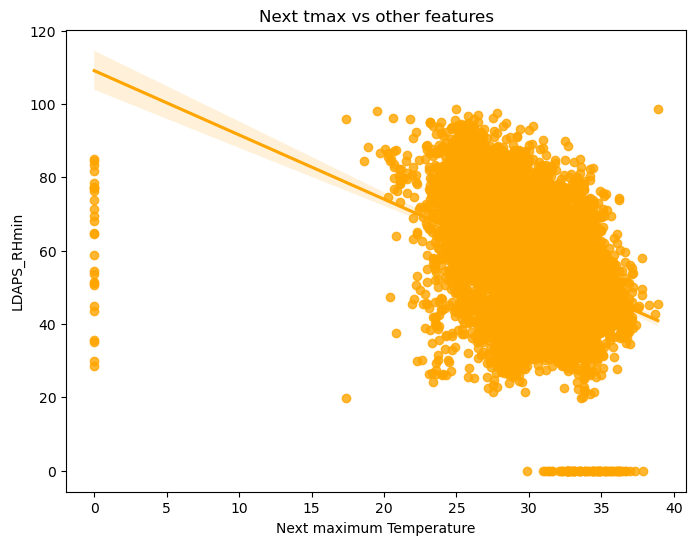

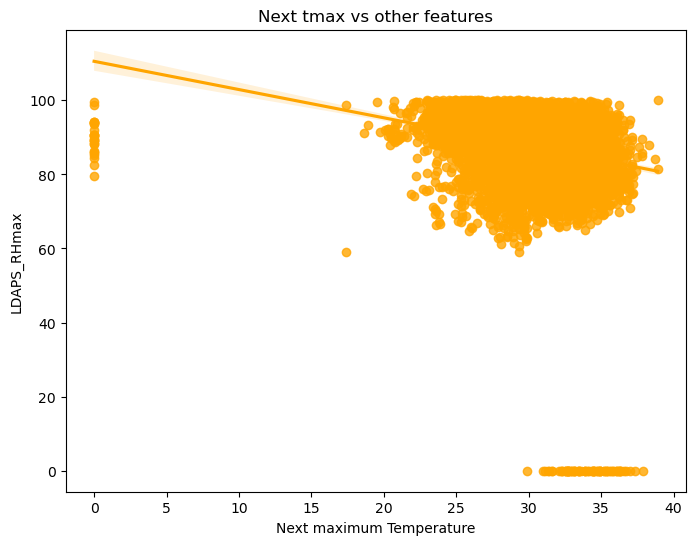

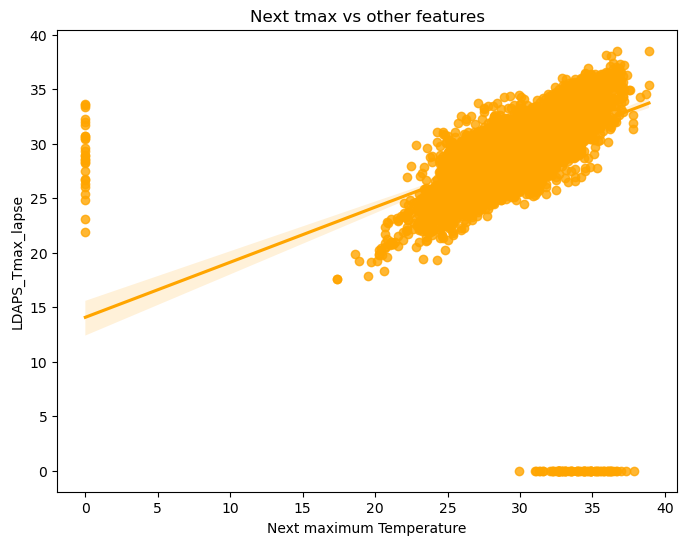

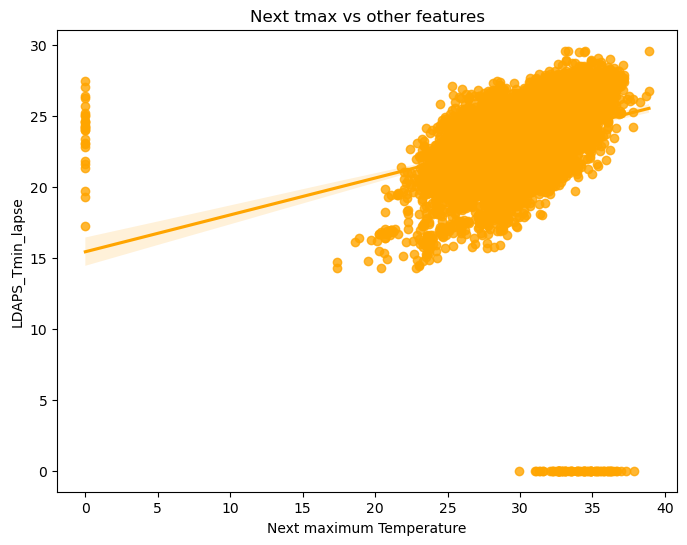

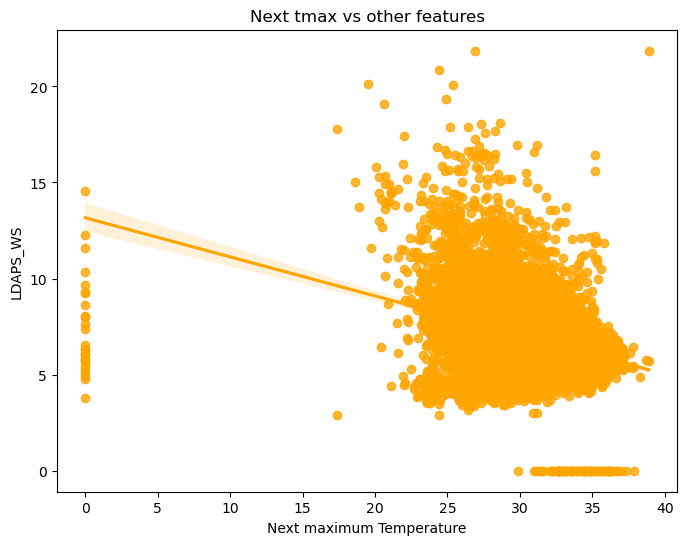

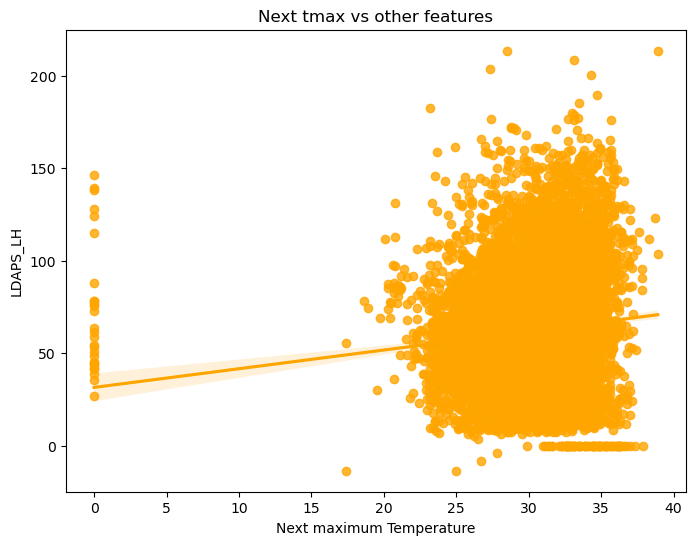

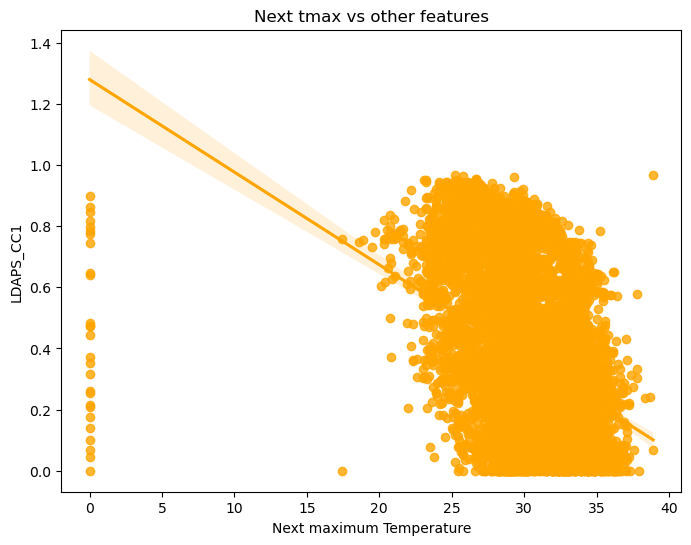

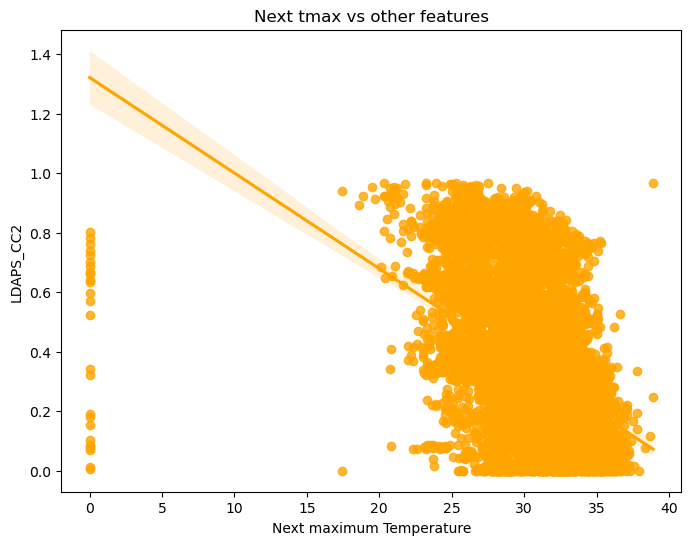

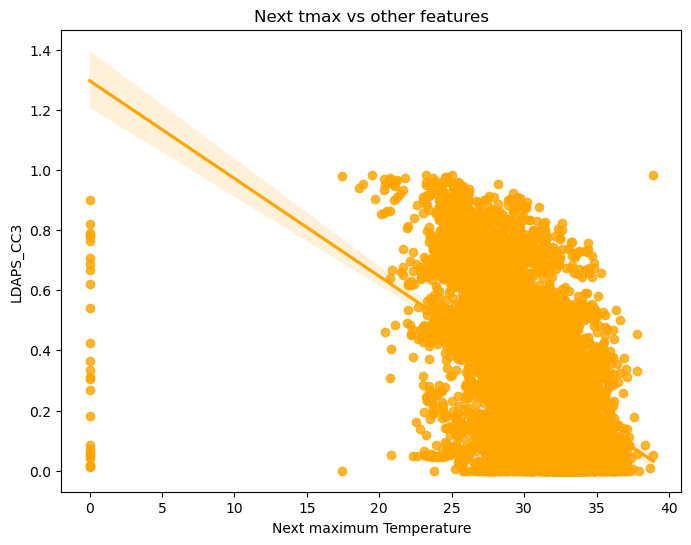

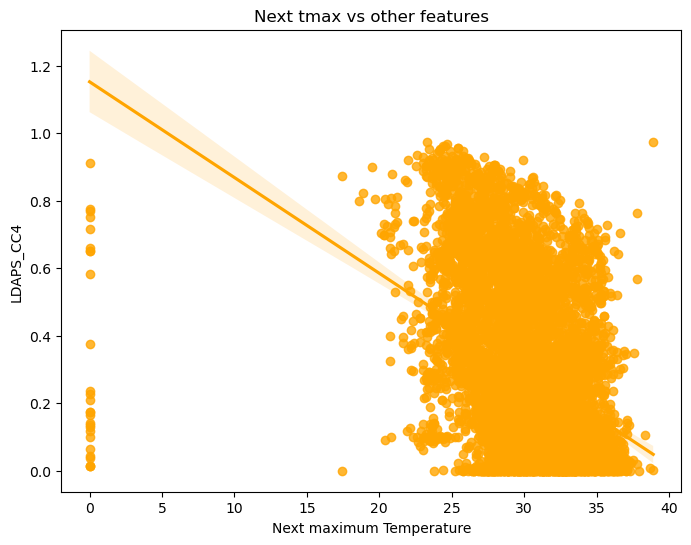

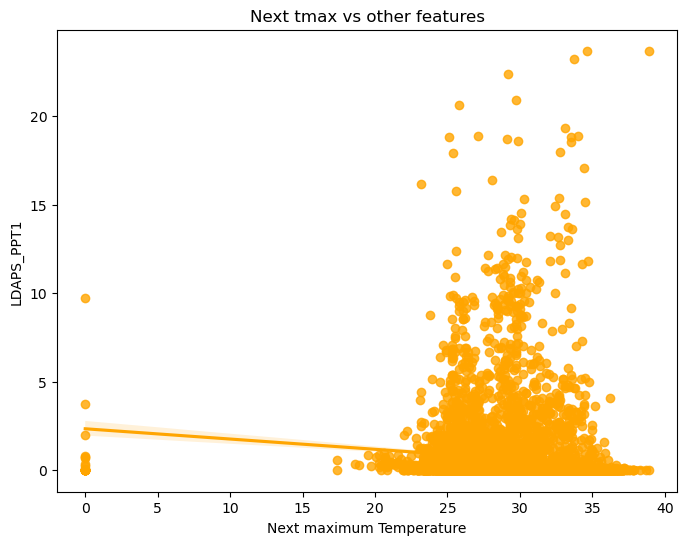

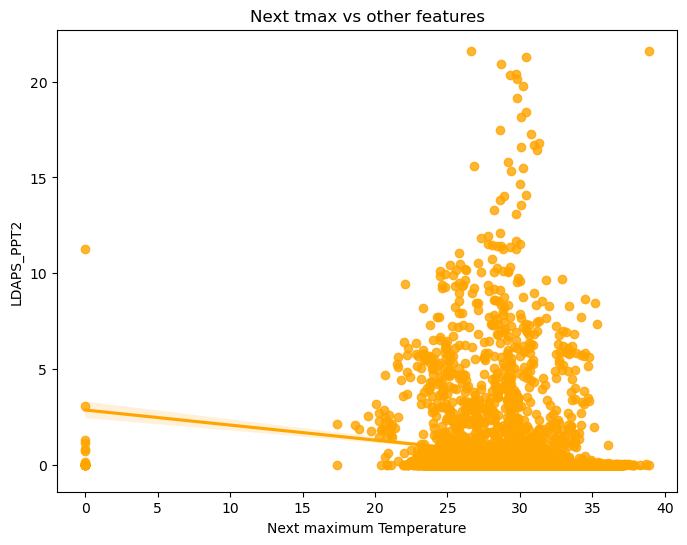

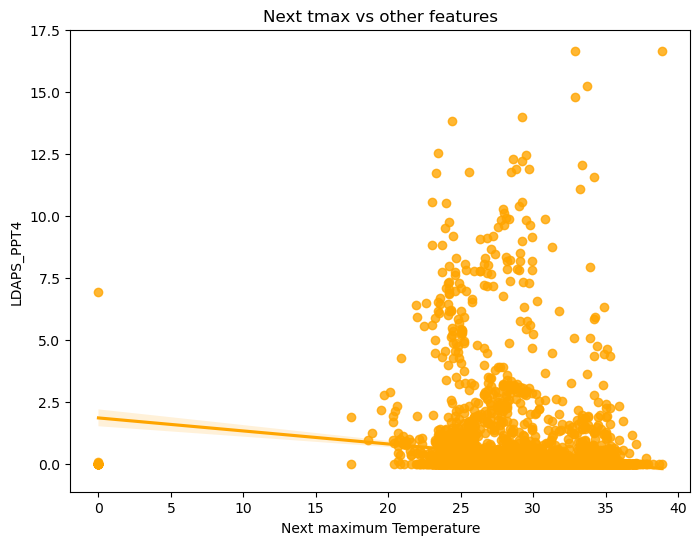

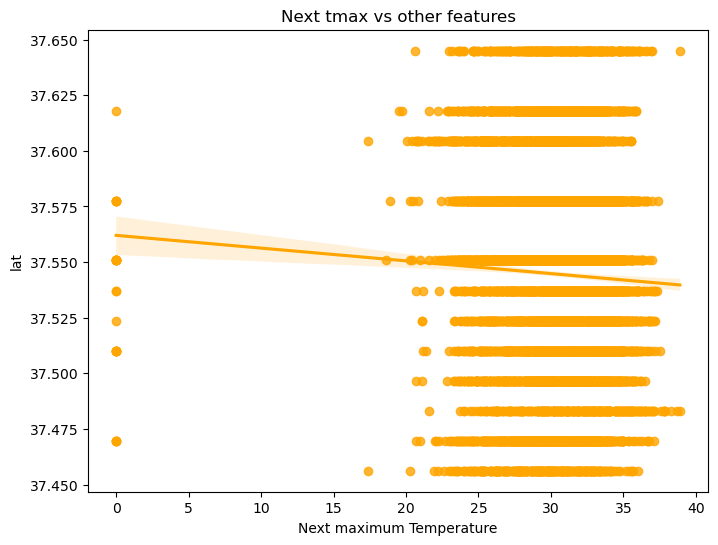

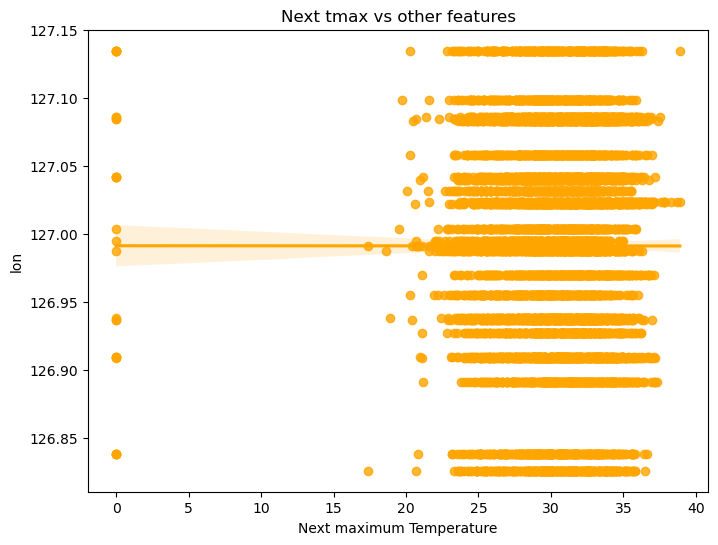

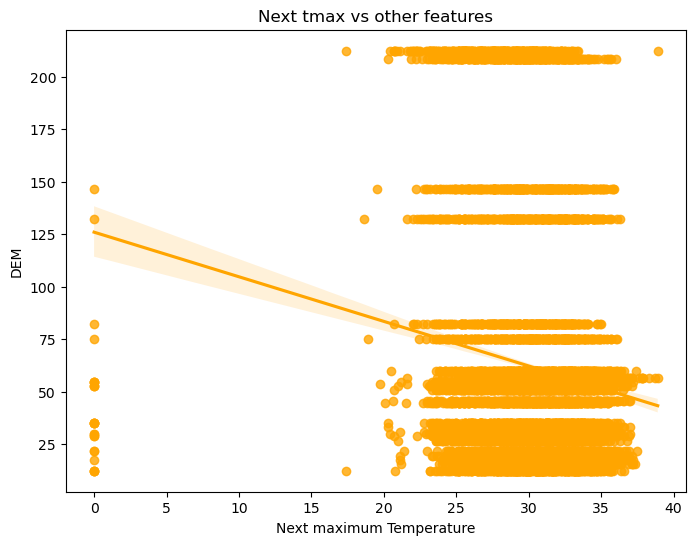

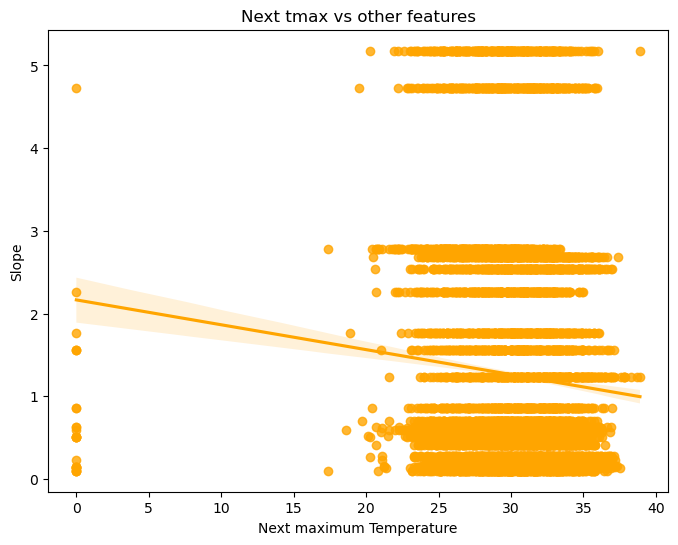

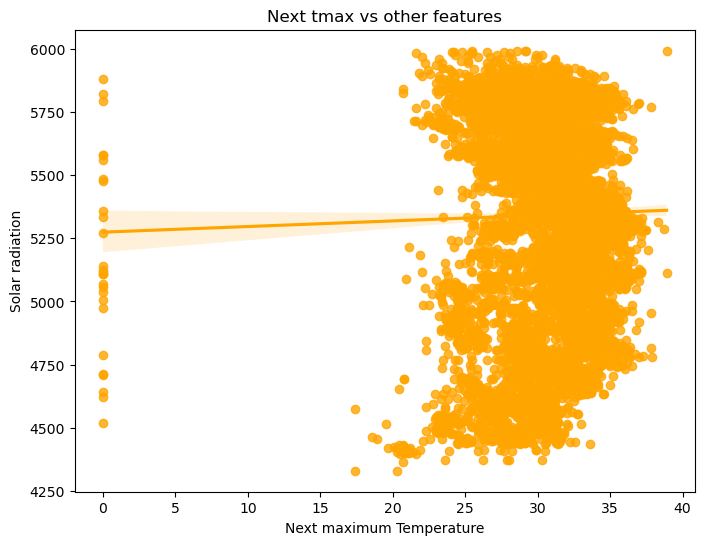

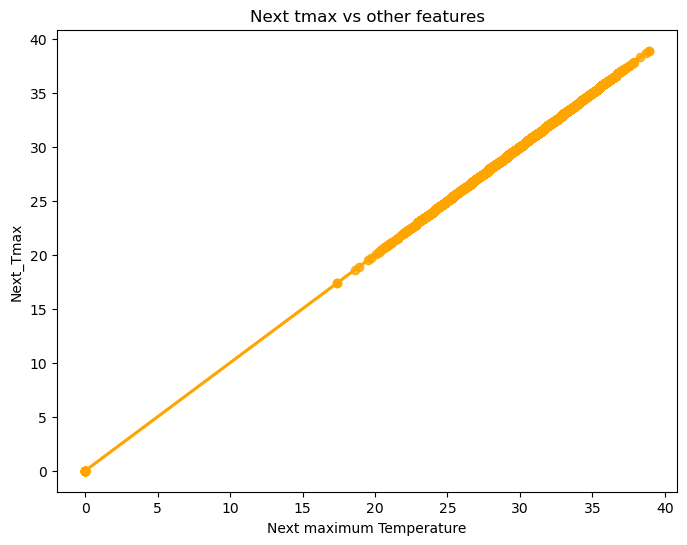

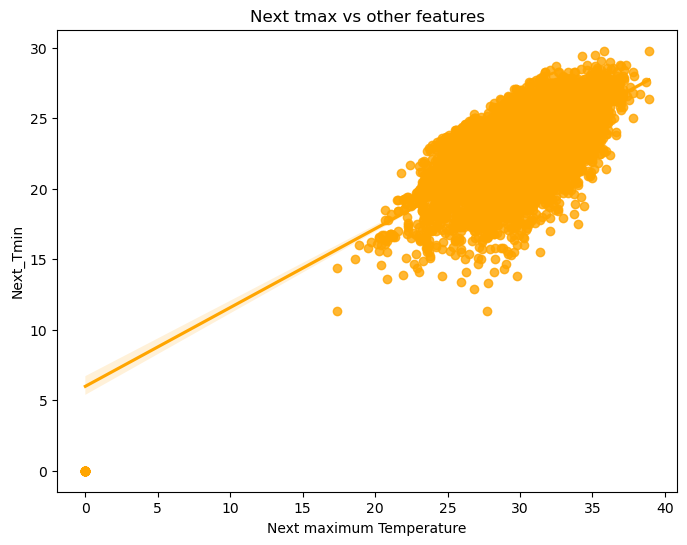

In [26]:
for i in df1.columns:
    plt.figure(figsize=(8,6))
    sns.regplot(x=df1['Next_Tmax'],y=df1[i],color='orange')
    plt.title('Next tmax vs other features')
    plt.xlabel('Next maximum Temperature')
    plt.ylabel(i)
    plt.show()

1) Next maximum temperature have positive relationship with next tmin,station,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Present_Tmax,Present_Tmin.
2) Next maximum temperature have negetive relationship with slope,DEM,LDAPS_RHmin,LDAPS_RHmax,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT4,LDAPS_PPT3.

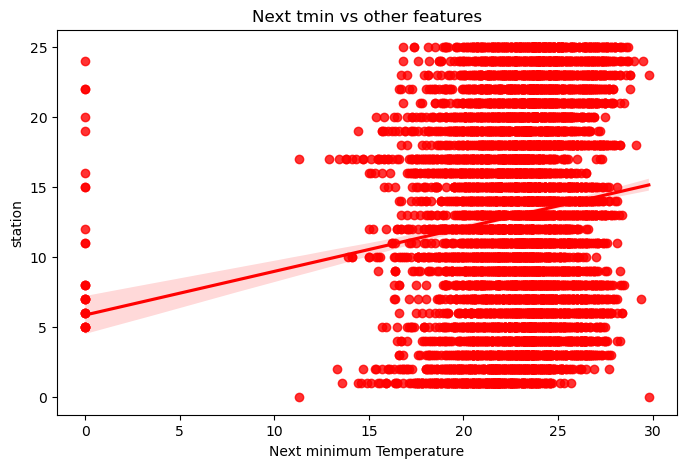

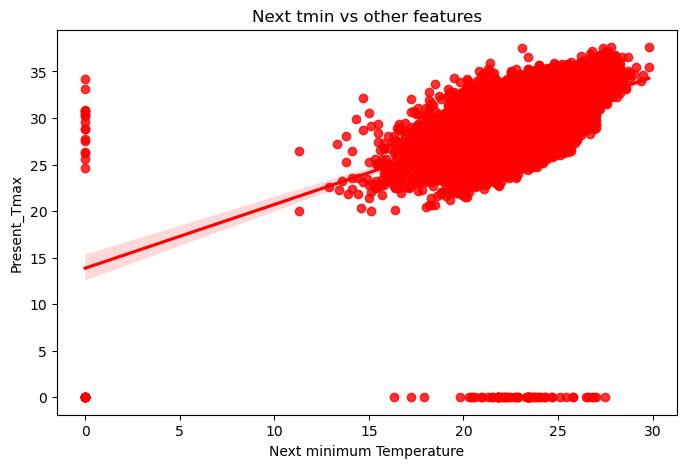

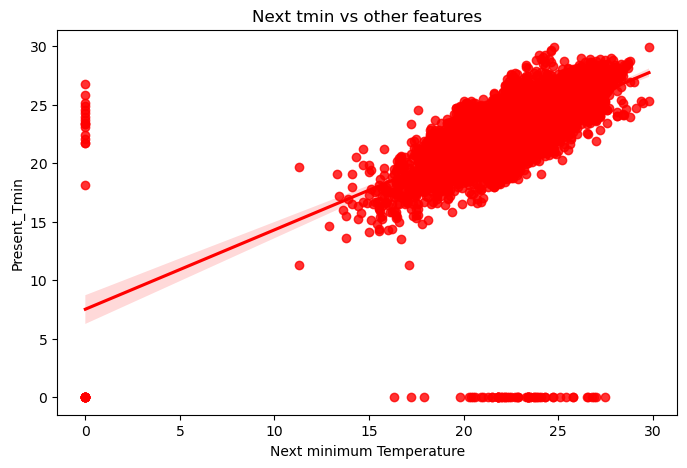

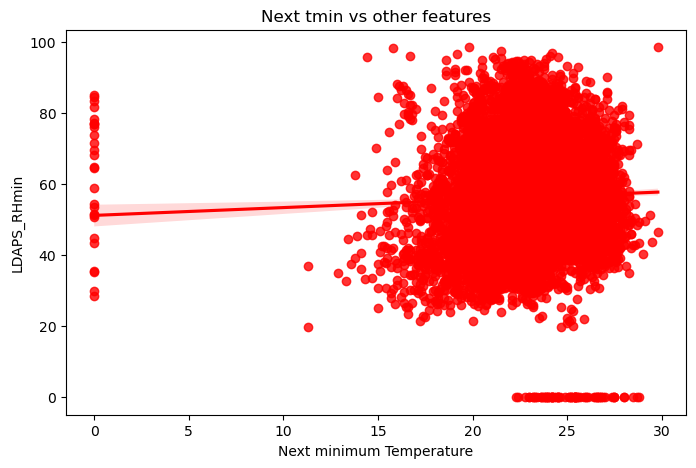

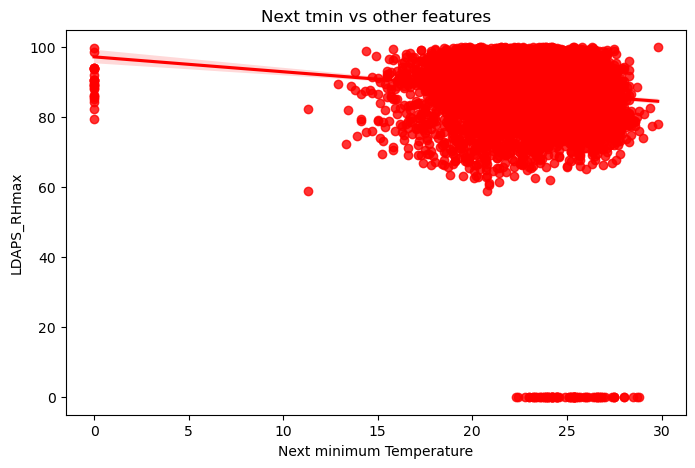

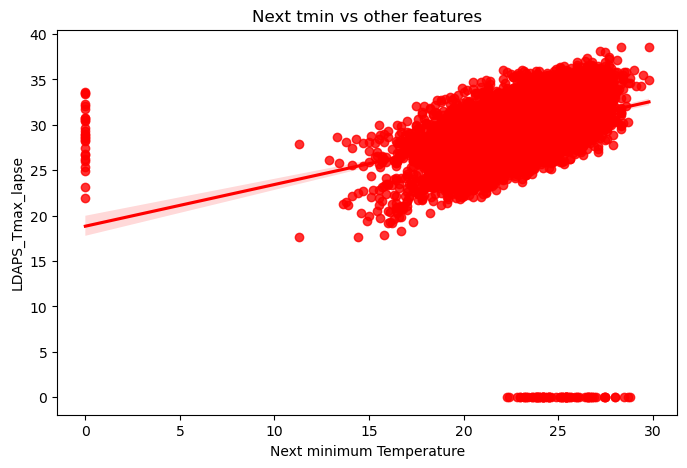

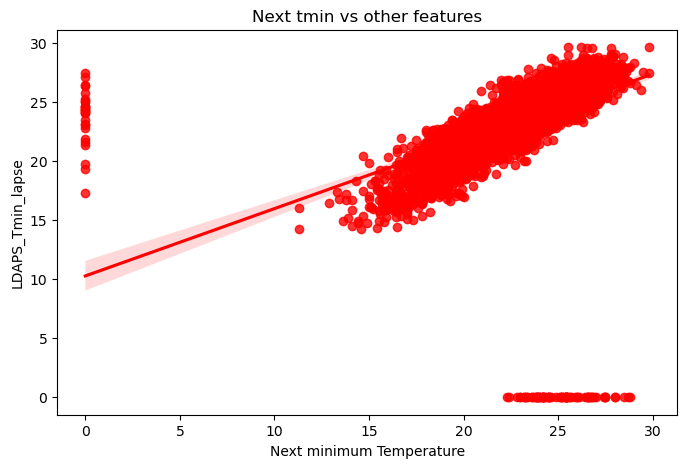

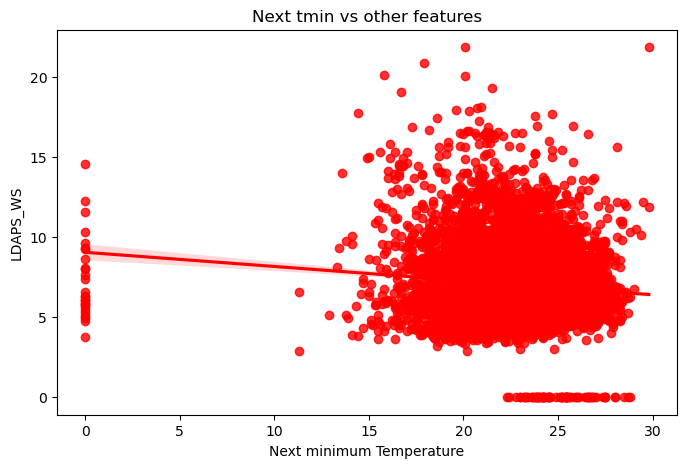

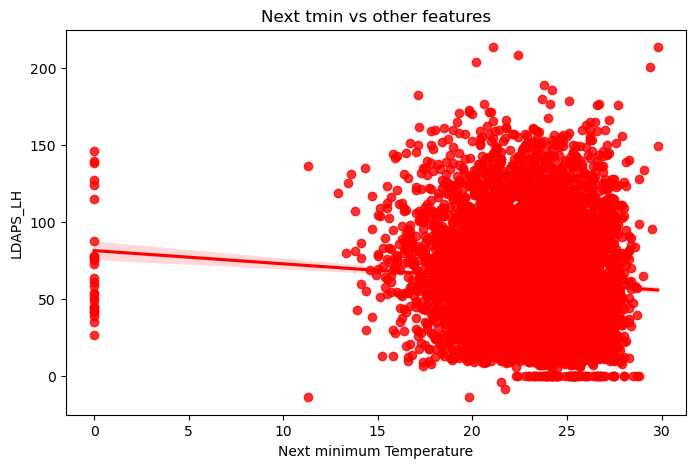

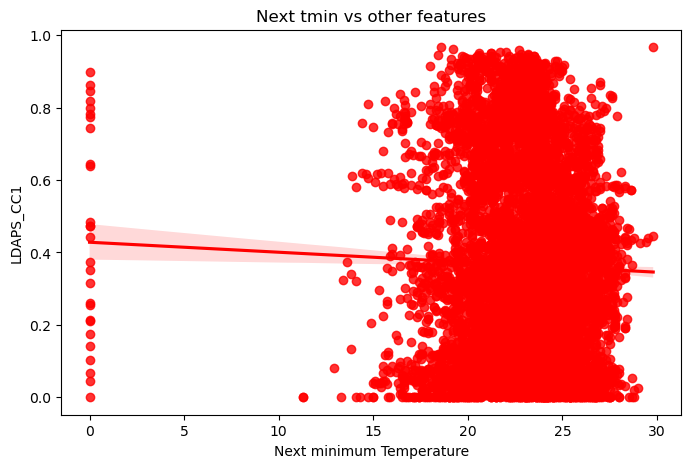

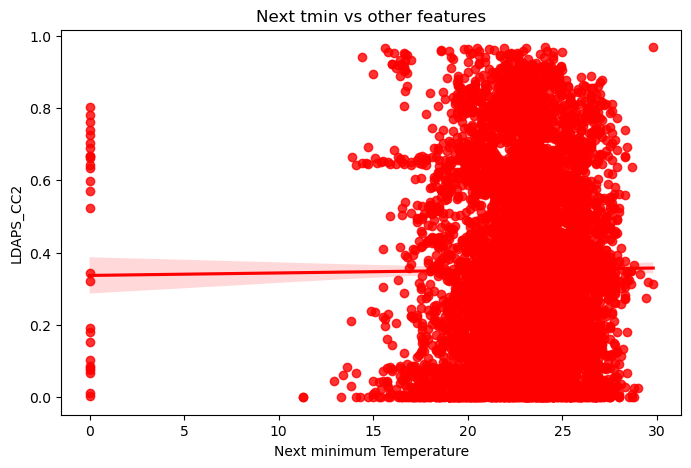

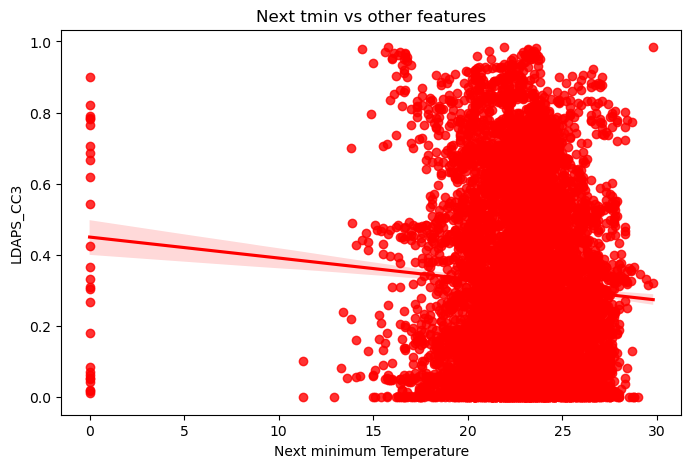

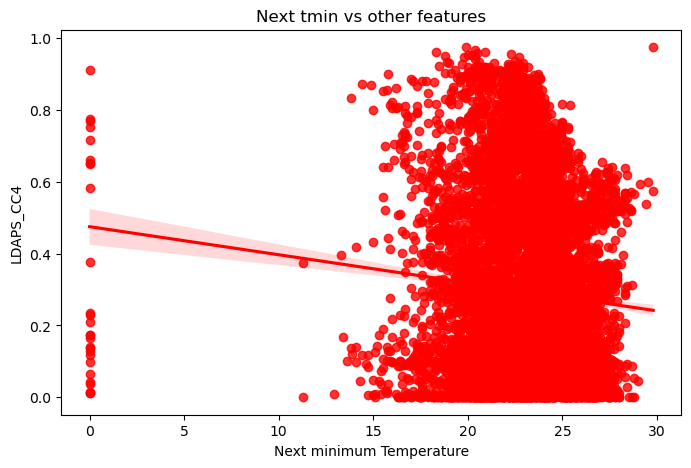

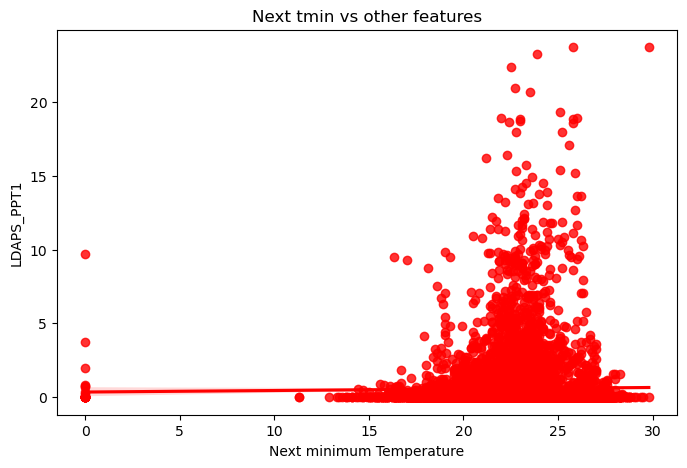

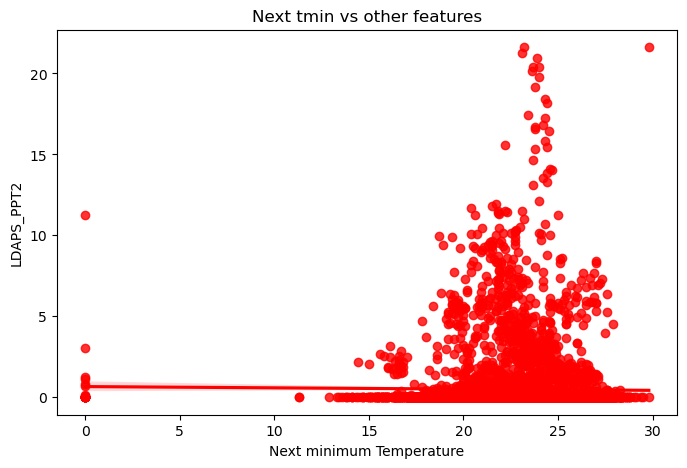

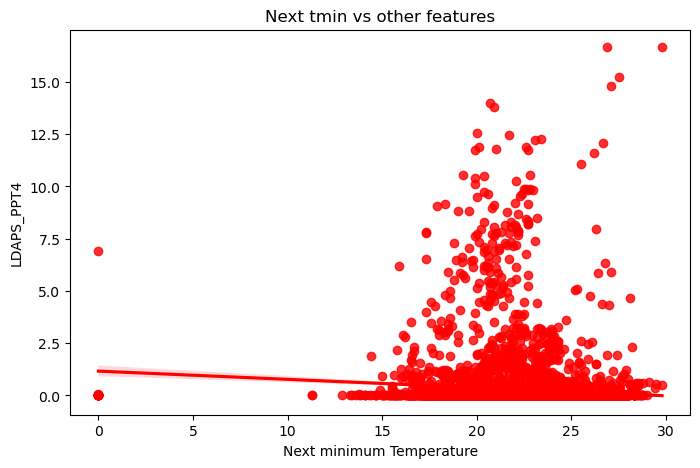

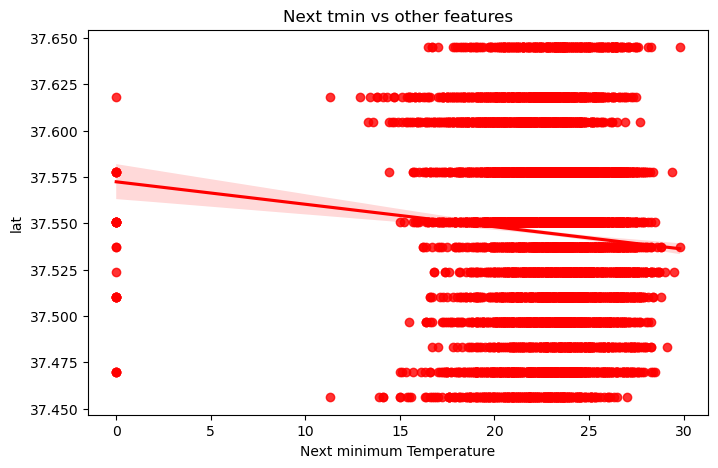

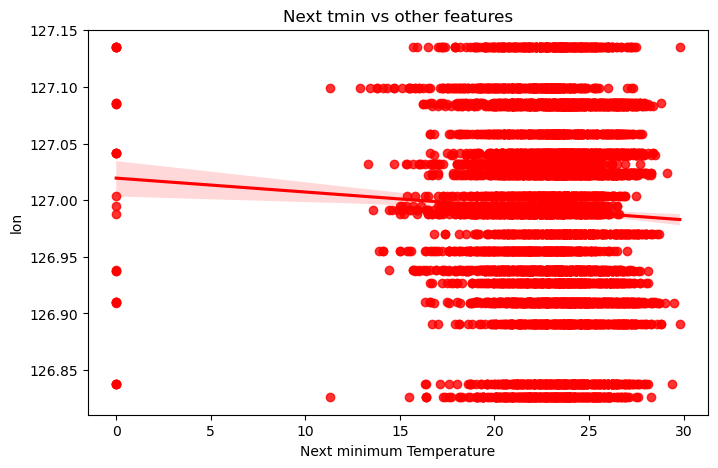

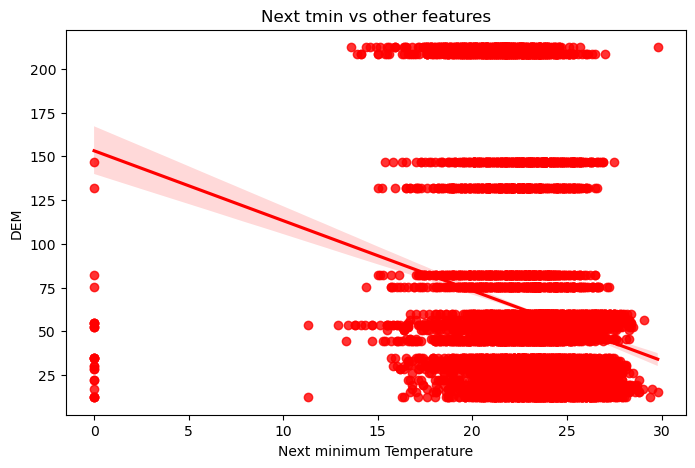

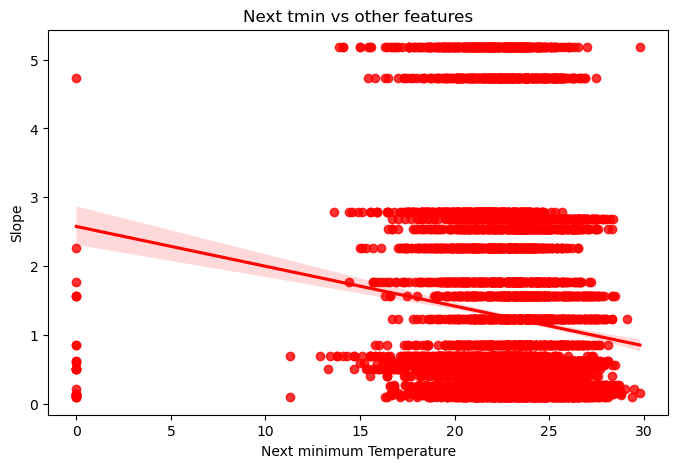

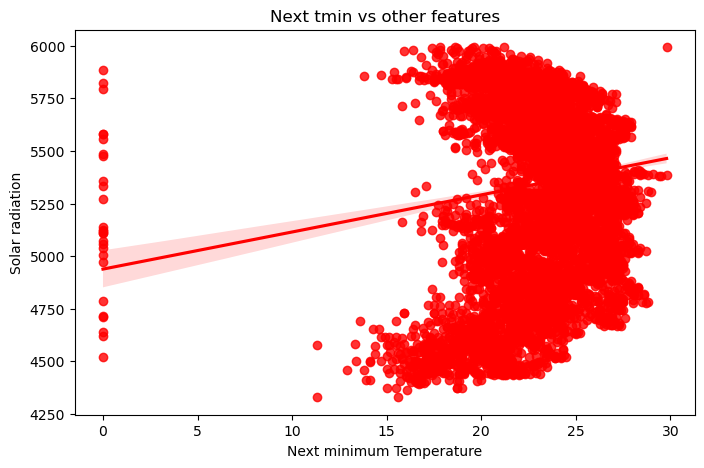

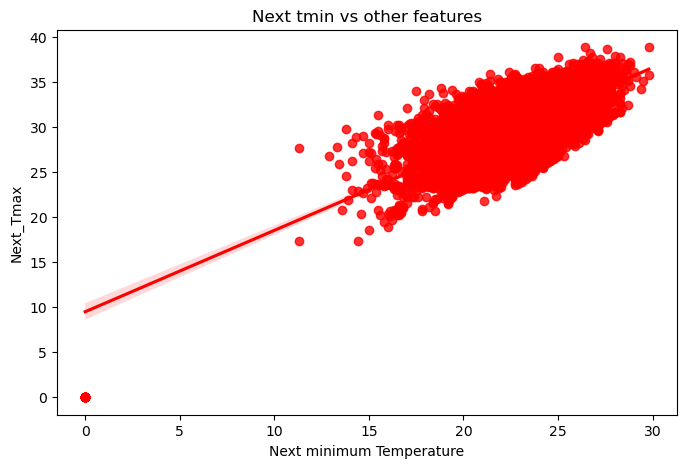

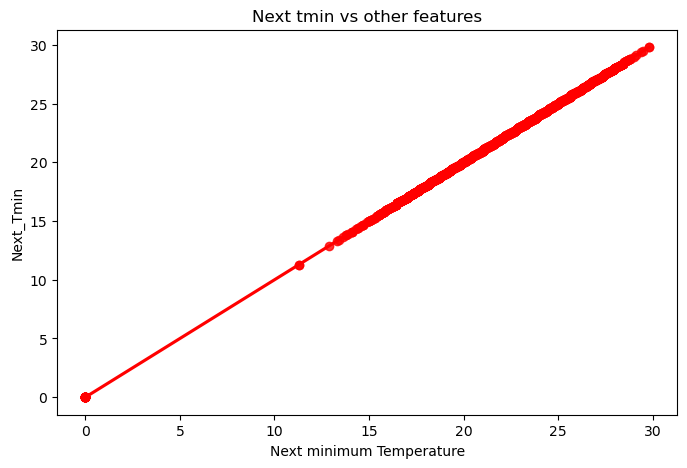

In [27]:
for i in df1.columns:
    plt.figure(figsize=(8,5))
    sns.regplot(x=df1['Next_Tmin'],y=df1[i],color='red')
    plt.title('Next tmin vs other features')
    plt.xlabel('Next minimum Temperature')
    plt.ylabel(i)
    plt.show()

1) Next minimum temperature have positive relationship with next tmaa,solar radiation,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Present_Tmax,Present_Tmin.
2) Next maximum temperature have negetive relationship with slope,DEM,LDAPS_RHmin,LDAPS_RHmax,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT4,LDAPS_PPT3.


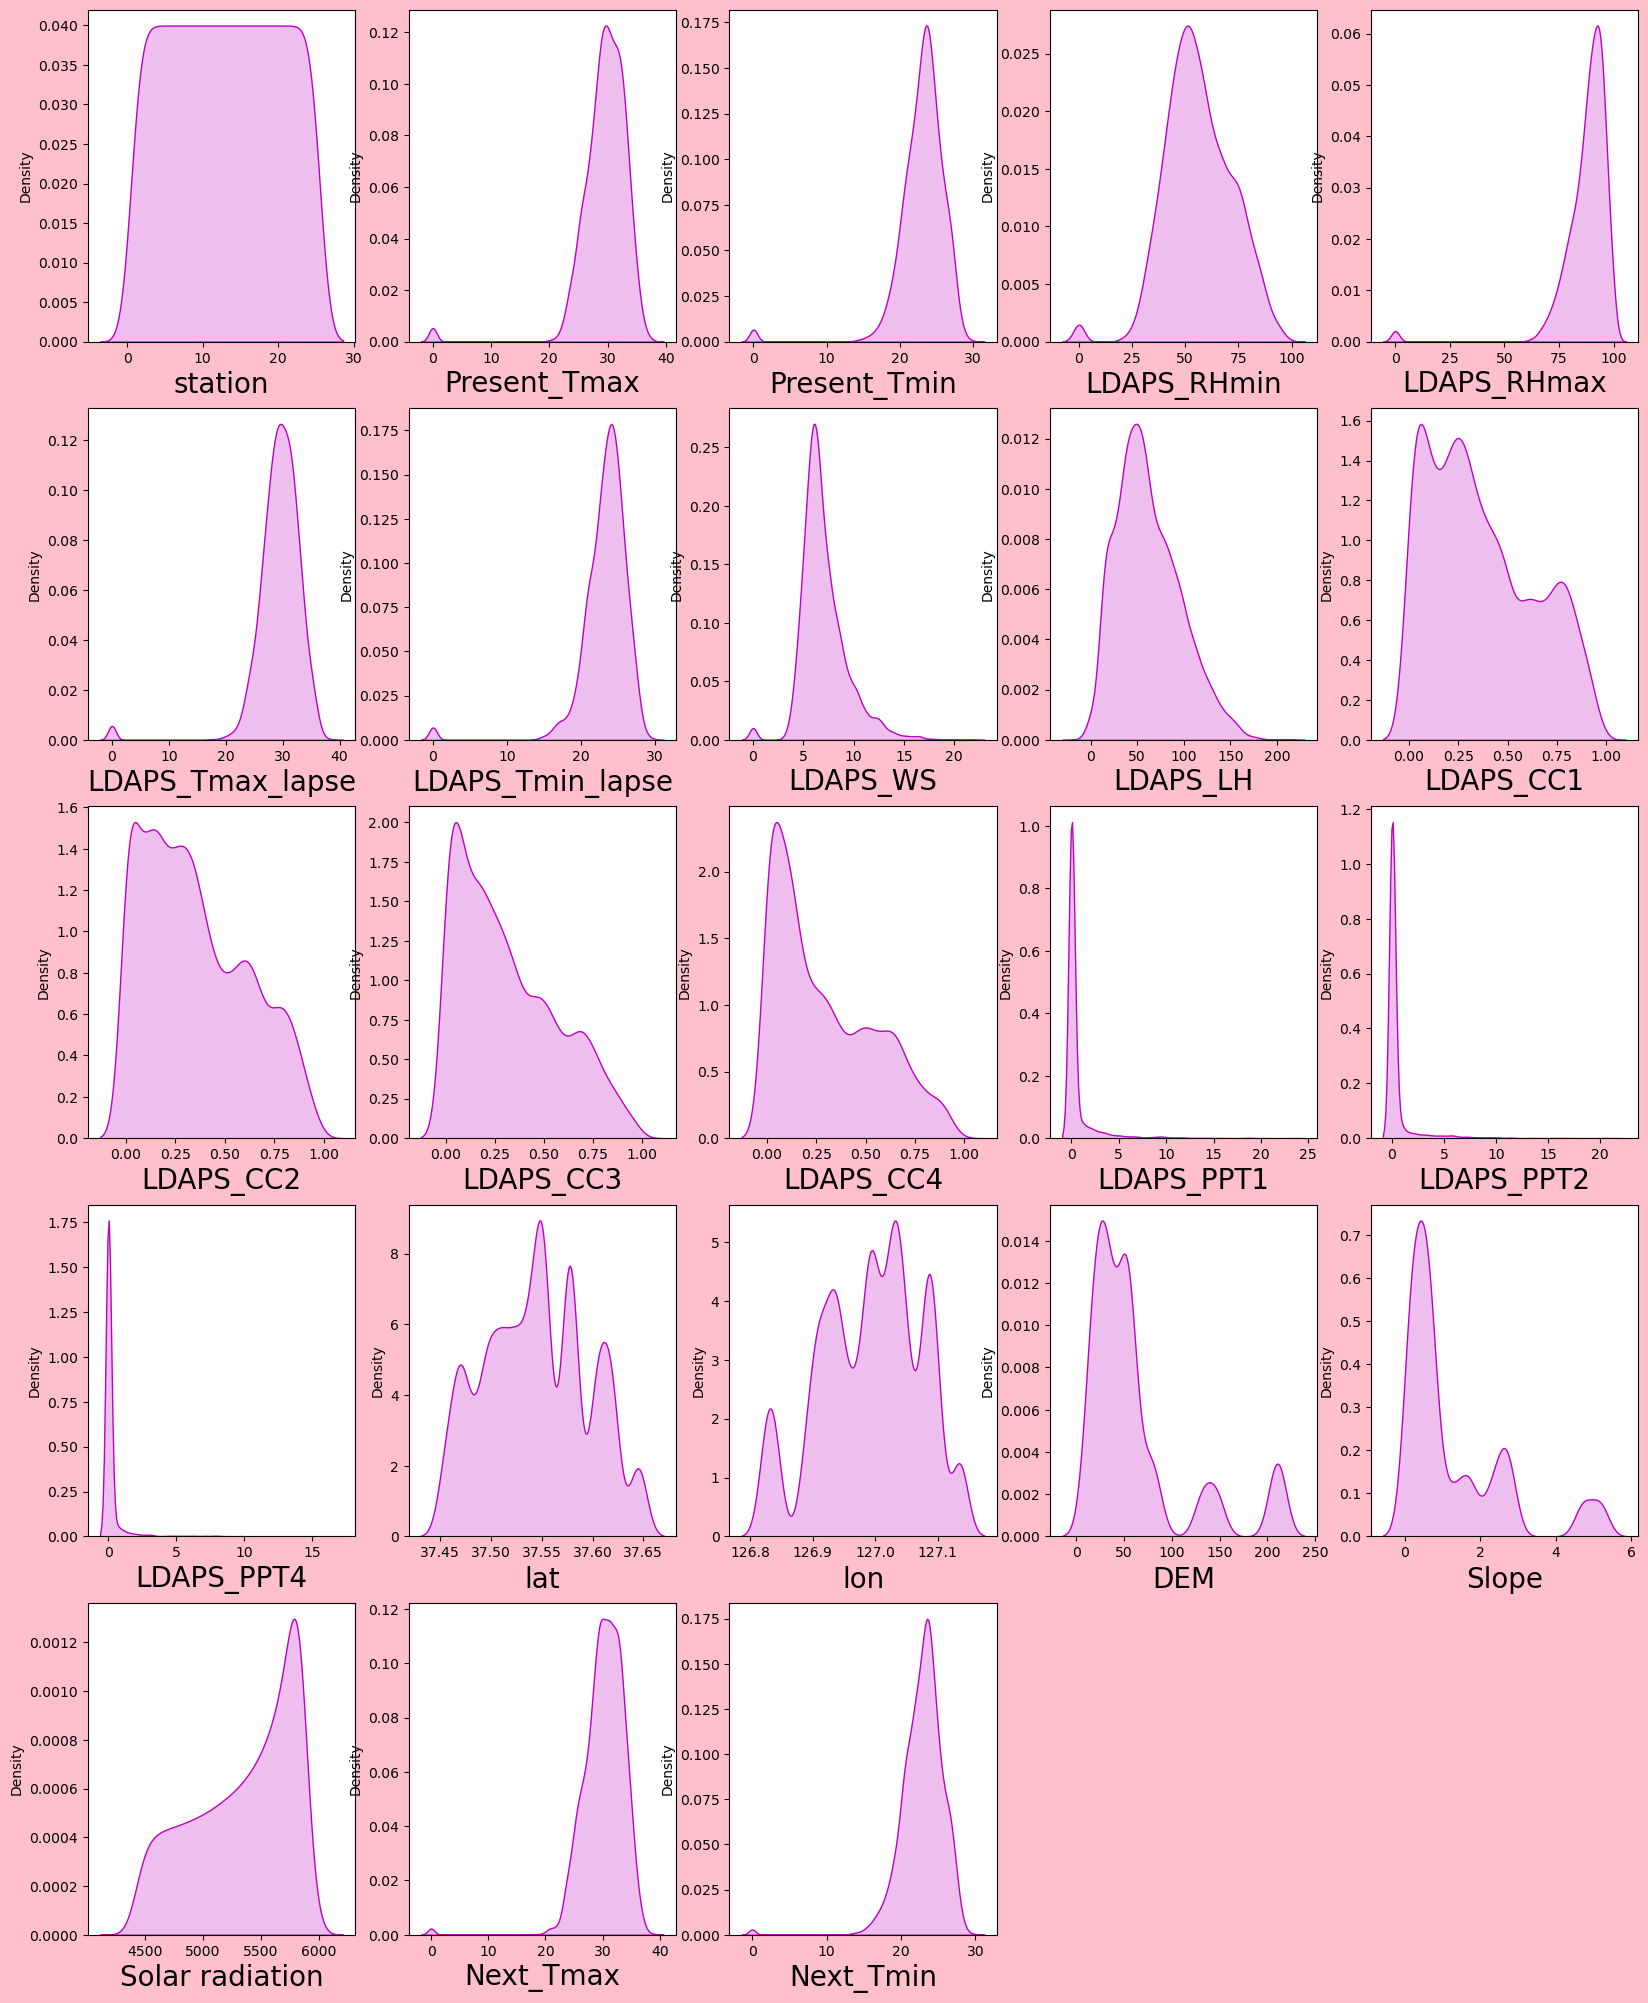

In [28]:
#checking for skewness
plt.figure(figsize=(20,25),facecolor='pink')
pltnumber=1
for column in df1:
    if pltnumber<=25:
        plt.subplot(5,5,pltnumber)
        sns.distplot(df1[column],color='m',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    pltnumber+=1
plt.show()

In [29]:
df.skew()

station             -0.000115
Present_Tmax        -3.402987
Present_Tmin        -3.232442
LDAPS_RHmin         -0.113889
LDAPS_RHmax         -4.712138
LDAPS_Tmax_lapse    -3.457452
LDAPS_Tmin_lapse    -3.573353
LDAPS_WS             1.163684
LDAPS_LH             0.635208
LDAPS_CC1            0.460727
LDAPS_CC2            0.474379
LDAPS_CC3            0.643064
LDAPS_CC4            0.671739
LDAPS_PPT1           5.395178
LDAPS_PPT2           5.776835
LDAPS_PPT3           6.458608
LDAPS_PPT4           6.826930
lat                  0.087062
lon                 -0.285213
DEM                  1.723257
Slope                1.563020
Solar radiation     -0.511210
Next_Tmax           -2.213759
Next_Tmin           -2.049088
Day                  0.244656
Month               -0.708304
Year               -62.067548
dtype: float64

1) 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse',&,'LDAPS_Tmin_lapse' are left skewed.
2) 'LDAPS_WS', 'LDAPS_LH','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4' are Right Skewed.

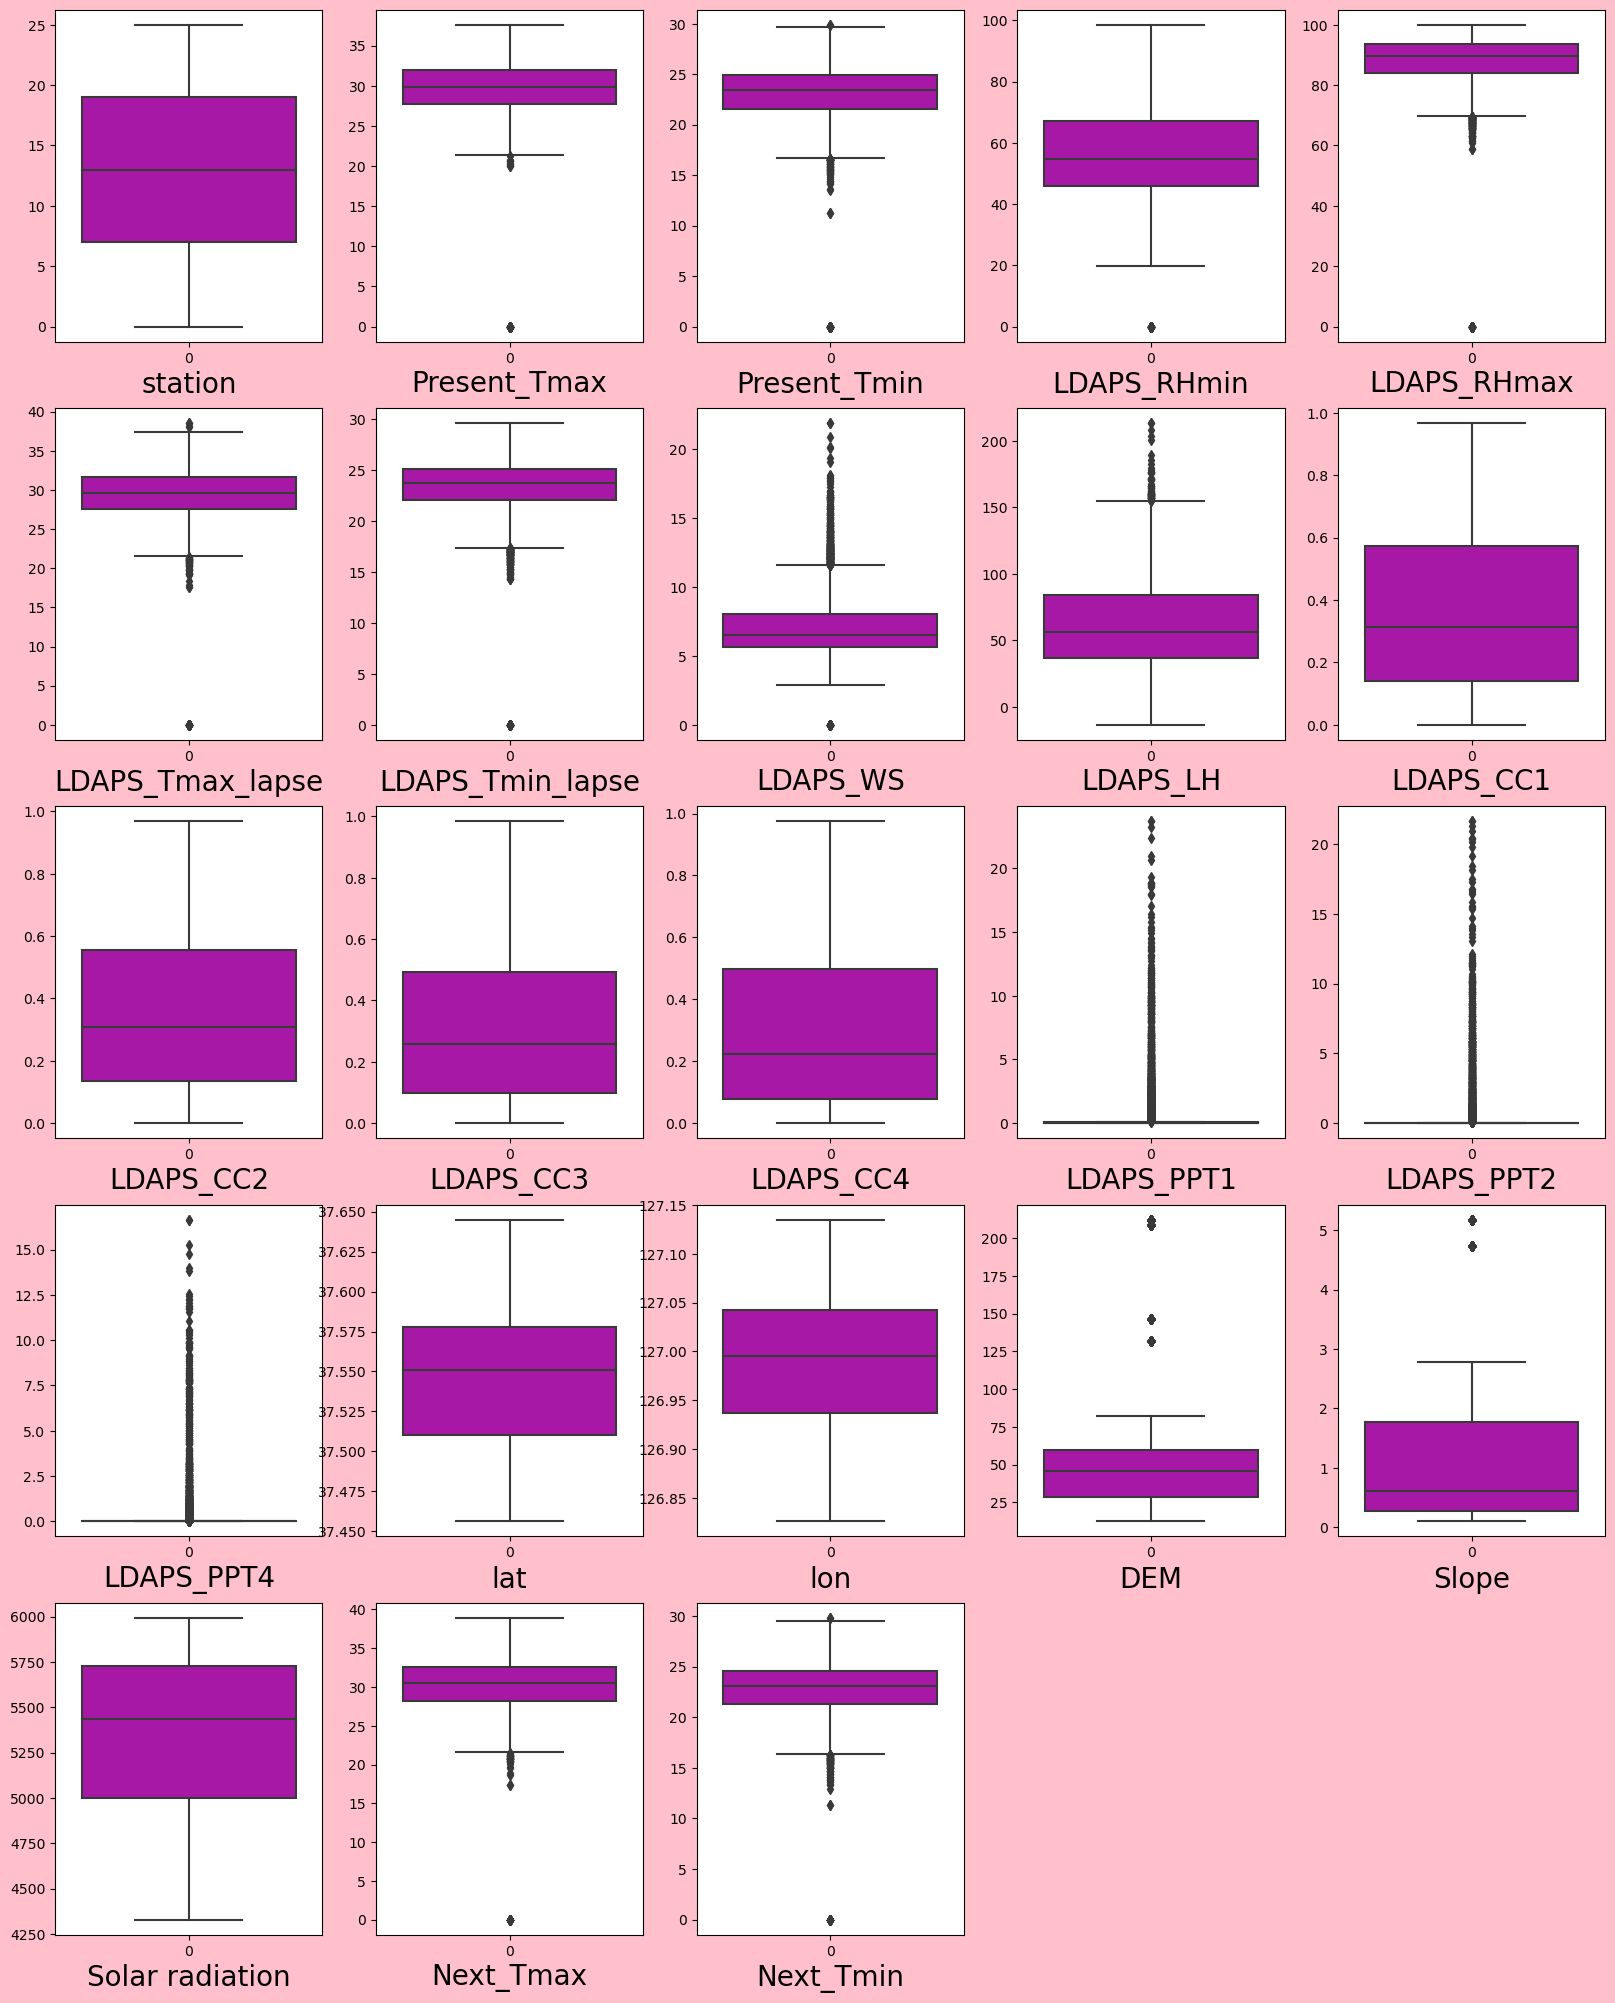

In [30]:
#boxplot for outliers
plt.figure(figsize=(20,25),facecolor='pink')
pltnumber=1
for column in df1:
    if pltnumber<=25:
        plt.subplot(5,5,pltnumber)
        sns.boxplot(df1[column],color='m')
        plt.xlabel(column,fontsize=20)
    pltnumber+=1
plt.show()

Outliers are present in the dataset.

# Removing outiers 

In [22]:
from scipy.stats import zscore

In [23]:
z=np.abs(zscore(df))

In [24]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(6866, 27)

In [25]:
#checking the percentage of data loss
dataloss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
dataloss

11.429308565531477

# Removing skewness

In [26]:
from sklearn.preprocessing import PowerTransformer

In [27]:
pt=PowerTransformer()
for i in df_new.columns:
    if abs(df_new.loc[:,i].skew())>0.5:
        df_new.loc[:,i]=pt.fit_transform(df_new.loc[:,i].values.reshape(-1,1))

In [28]:
df_new.skew()

station            -0.005208
Present_Tmax       -0.304130
Present_Tmin       -0.336394
LDAPS_RHmin         0.319784
LDAPS_RHmax        -0.109055
LDAPS_Tmax_lapse   -0.154633
LDAPS_Tmin_lapse   -0.025676
LDAPS_WS            0.008121
LDAPS_LH           -0.032187
LDAPS_CC1           0.064453
LDAPS_CC2           0.050370
LDAPS_CC3           0.093838
LDAPS_CC4           0.143295
LDAPS_PPT1          1.622609
LDAPS_PPT2          1.830116
LDAPS_PPT3          1.997993
LDAPS_PPT4          2.255055
lat                 0.100668
lon                -0.274125
DEM                 0.039703
Slope               0.233316
Solar radiation    -0.175524
Next_Tmax          -0.287493
Next_Tmin          -0.341106
Day                 0.247372
Month               0.042877
Year                0.011466
dtype: float64

In [29]:
df_new.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.117603      0.135628    -0.073154   
Present_Tmax      0.117603      1.000000      0.619820    -0.143899   
Present_Tmin      0.135628      0.619820      1.000000     0.166033   
LDAPS_RHmin      -0.073154     -0.143899      0.166033     1.000000   
LDAPS_RHmax      -0.185407     -0.308281     -0.032388     0.572450   
LDAPS_Tmax_lapse  0.073577      0.555080      0.463324    -0.529647   
LDAPS_Tmin_lapse  0.113273      0.634145      0.773090     0.123569   
LDAPS_WS          0.026806     -0.063470      0.033381     0.169657   
LDAPS_LH         -0.136810      0.109081     -0.014198    -0.000098   
LDAPS_CC1         0.009887     -0.283064      0.101294     0.579656   
LDAPS_CC2         0.006255     -0.161362      0.121510     0.699515   
LDAPS_CC3         0.004856     -0.062521      0.042718     0.633710   
LDAPS_CC4         0.010541     -0.043471      0.005717     0.459723   
LDAPS_PPT1       -0.004967     -0.183500      0.073397     0.417325   
LDAPS_PPT2       -0.009835     -0.093377      0.097436     0.514722   
LDAPS_PPT3       -0.010135     -0.024322      0.035308     0.409926   
LDAPS_PPT4       -0.003271     -0.022863     -0.063822     0.249159   
lat              -0.241659     -0.055844     -0.075493     0.087444   
lon              -0.123525      0.010249     -0.042069    -0.091052   
DEM              -0.328264     -0.144122     -0.248194     0.057736   
Slope            -0.148136     -0.103375     -0.165405     0.084651   
Solar radiation  -0.029157     -0.070439     -0.018638     0.227814   
Next_Tmax         0.111108      0.597058      0.461164    -0.409192   
Next_Tmin         0.131513      0.624325      0.797579     0.150547   
Day               0.001402     -0.155034     -0.097307    -0.074908   
Month             0.000009      0.031908     -0.019022    -0.063871   
Year              0.006070      0.078539      0.071388    -0.006378   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.185407          0.073577          0.113273  0.026806   
Present_Tmax        -0.308281          0.555080          0.634145 -0.063470   
Present_Tmin        -0.032388          0.463324          0.773090  0.033381   
LDAPS_RHmin          0.572450         -0.529647          0.123569  0.169657   
LDAPS_RHmax          1.000000         -0.380876         -0.161011  0.059279   
LDAPS_Tmax_lapse    -0.380876          1.000000          0.640375 -0.150796   
LDAPS_Tmin_lapse    -0.161011          0.640375          1.000000 -0.002423   
LDAPS_WS             0.059279         -0.150796         -0.002423  1.000000   
LDAPS_LH             0.288160         -0.000970         -0.145003 -0.048472   
LDAPS_CC1            0.410742         -0.401316          0.055145  0.181961   
LDAPS_CC2            0.358832         -0.474506          0.095299  0.135569   
LDAPS_CC3            0.141849         -0.461837          0.027775  0.061489   
LDAPS_CC4            0.050169         -0.354432         -0.011297  0.093655   
LDAPS_PPT1           0.423688         -0.298094         -0.048083  0.198395   
LDAPS_PPT2           0.372684         -0.333175          0.025702  0.167087   
LDAPS_PPT3           0.224870         -0.281410         -0.017198  0.095746   
LDAPS_PPT4           0.119840         -0.210290         -0.082600  0.174713   
lat                  0.228577         -0.040891         -0.094350 -0.027163   
lon                  0.016820          0.104024         -0.025339 -0.077646   
DEM                  0.177289         -0.122308         -0.185160  0.118098   
Slope                0.211203         -0.114810         -0.167579  0.100417   
Solar radiation      0.144311         -0.008482          0.033241  0.164882   
Next_Tmax           -0.297187          0.822956          0.570305 -0.203750   
Next_Tmin           -0.082856          0.571929          0.878740  0.019709   
Day                 -0.008734         -0.158374        

<Axes: >

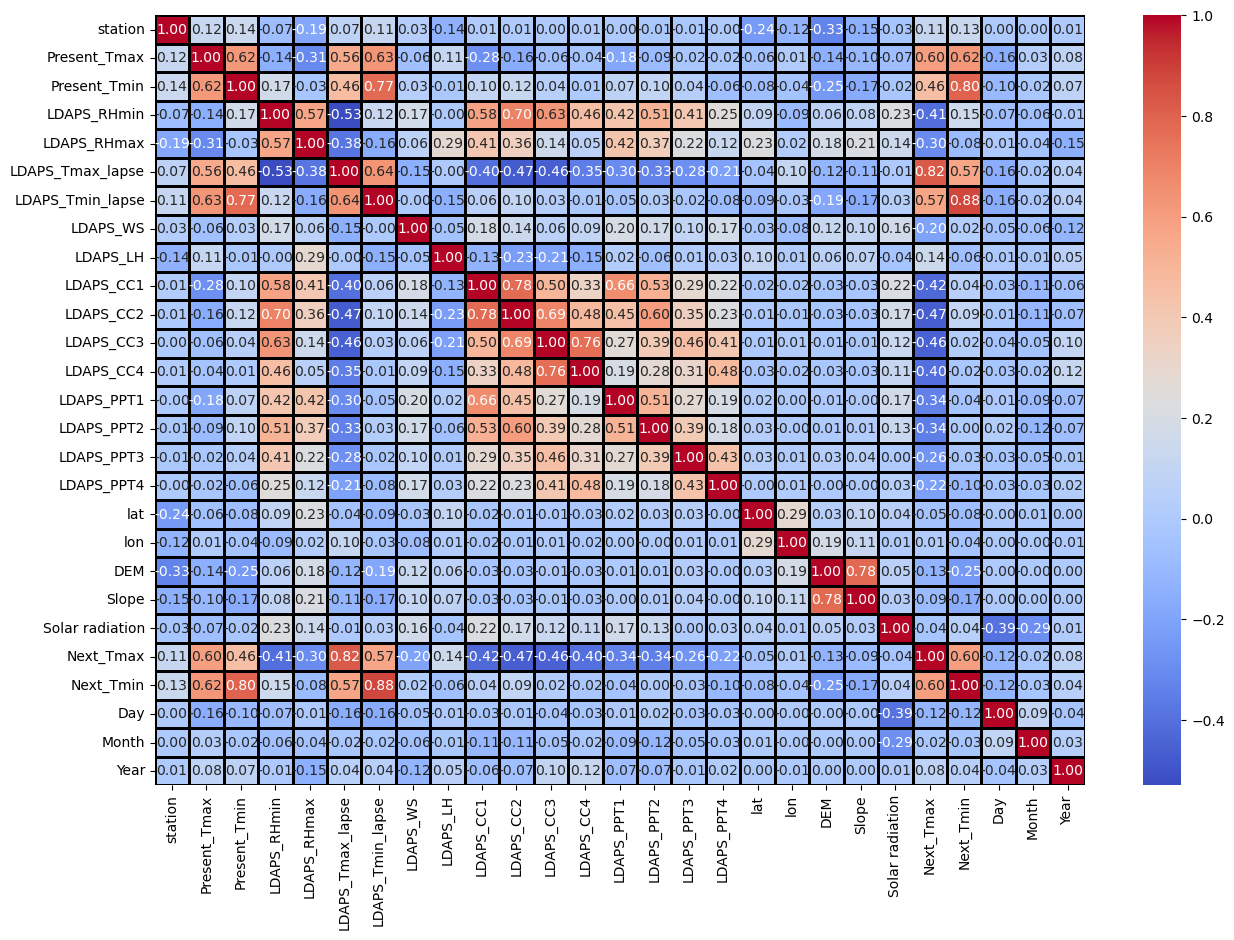

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidth=1,linecolor='black')

In [30]:
#spliting the dataset
x = df_new.drop(["Next_Tmax","Next_Tmin"],axis=1)
ymax = df_new["Next_Tmax"]
ymin = df_new["Next_Tmin"]

In [31]:
print(x.shape)
print(ymax.shape)
print(ymin.shape)

(6866, 25)
(6866,)
(6866,)


# Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [34]:
st=StandardScaler()
X = pd.DataFrame(st.fit_transform(x), columns=x.columns)

# Multicollinearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF value']=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features']= X.columns

In [36]:
vif

VIF value          Features
0    1.293321           station
1    2.876609      Present_Tmax
2    3.239038      Present_Tmin
3    5.875913       LDAPS_RHmin
4    2.631222       LDAPS_RHmax
5    6.613352  LDAPS_Tmax_lapse
6    6.942287  LDAPS_Tmin_lapse
7    1.215401          LDAPS_WS
8    1.500258          LDAPS_LH
9    4.433175         LDAPS_CC1
10   5.144488         LDAPS_CC2
11   4.602868         LDAPS_CC3
12   2.764620         LDAPS_CC4
13   2.234181        LDAPS_PPT1
14   1.939986        LDAPS_PPT2
15   1.601588        LDAPS_PPT3
16   1.606372        LDAPS_PPT4
17   1.289551               lat
18   1.225027               lon
19   3.279615               DEM
20   2.850664             Slope
21   1.496259   Solar radiation
22   1.270408               Day
23   1.120242             Month
24   1.119435              Year

# Model Building

In [38]:
#importing libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

# 1) Model building for Predicting Maximum Temperature for Next Day

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,ymax,test_size=.2,random_state=40)

In [40]:
model=[LinearRegression(),Lasso(),Ridge(),SVR(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),ExtraTreesRegressor(),DecisionTreeRegressor(),KNeighborsRegressor()]

# Finding best Random State

In [43]:
maxscore=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,ymax,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    score=r2_score(y_test,pred)
    if score>maxscore:
        maxscore=score
        maxRS=i
            
print('Maximum r2 score is :',maxscore,'For random state :',maxRS)

Maximum r2 score is : 0.7976812957926815 For random state : 30


In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,ymax,test_size=.2,random_state=30)

In [45]:
print(x_train.shape,y_train.shape)

(5492, 25) (5492,)


In [46]:
print(x_test.shape,y_test.shape)

(1374, 25) (1374,)


In [48]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred=m.predict(x_test)
    
    print(m,':')
    print('__________________________')
    print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
    print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n R2 Score :')
    print(r2_score(y_test,y_pred))
    print('=================================================================================================================')

LinearRegression() :
__________________________
Mean Absolute Error : 1.0359383302651672
Mean Squared Error : 1.820496763948518
Root Mean Squared Error : 1.349257856730328

 R2 Score :
0.7976812957926815
Lasso() :
__________________________
Mean Absolute Error : 1.5315246594133314
Mean Squared Error : 3.7172031152842053
Root Mean Squared Error : 1.9280049572768752

 R2 Score :
0.5868931313403996
Ridge() :
__________________________
Mean Absolute Error : 1.0359430420721476
Mean Squared Error : 1.82049020216179
Root Mean Squared Error : 1.349255425100003

 R2 Score :
0.7976820250289067
SVR() :
__________________________
Mean Absolute Error : 0.7166549862030414
Mean Squared Error : 0.9437050687997613
Root Mean Squared Error : 0.9714448356956566

 R2 Score :
0.8951224795042562
RandomForestRegressor() :
__________________________
Mean Absolute Error : 0.6557627365356625
Mean Squared Error : 0.7237779097525477
Root Mean Squared Error : 0.8507513795184511

 R2 Score :
0.9195638181100563
Gradi

Here ExtraTreesRegressor is giving best r2_score 0.9373

# Cross Validation Score

In [49]:
for m in model:
    score=cross_val_score(m,X,ymax,cv=5)
    print('\n')
    print('Cross Val Score of ',m,':')
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard Deviation :',score.std())
    print('============================================================================================================')



Cross Val Score of  LinearRegression() :
Score : [0.70850967 0.65546541 0.66932956 0.75774656 0.54266542]
Mean Score : 0.6667433217142011
Standard Deviation : 0.07149156833907609


Cross Val Score of  Lasso() :
Score : [0.51856985 0.48303477 0.55958986 0.45195912 0.5560875 ]
Mean Score : 0.5138482168216234
Standard Deviation : 0.041661678125150516


Cross Val Score of  Ridge() :
Score : [0.70864068 0.65537552 0.66929789 0.7578348  0.54287281]
Mean Score : 0.666804339706401
Standard Deviation : 0.07146003730021609


Cross Val Score of  SVR() :
Score : [0.71053115 0.54353197 0.68025796 0.74704446 0.57079673]
Mean Score : 0.6504324538732671
Standard Deviation : 0.0795045361035535


Cross Val Score of  RandomForestRegressor() :
Score : [0.749809   0.65641922 0.64702595 0.72300119 0.61224002]
Mean Score : 0.6776990771496544
Standard Deviation : 0.050854074340904575


Cross Val Score of  GradientBoostingRegressor() :
Score : [0.76362977 0.67538685 0.69380136 0.75575484 0.63229598]
Mean Sco

Here also  ExtraTreesRegressor is giving the hieghst score.

# Hyper Parameter Tuning

In [50]:
param={'n_estimators': [50, 100],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    }

In [51]:
grid=GridSearchCV(estimator= ExtraTreesRegressor(),param_grid=param,cv=5)
grid.fit(X,ymax)
print(grid)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]})


In [53]:
print(grid.best_score_)
print(grid.best_params_)

0.6873593447879103
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}


In [54]:
final_model=ExtraTreesRegressor(max_depth=20,min_samples_leaf=2,min_samples_split=3,n_estimators=100)

In [56]:
x_train,x_test,y_train,y_test = train_test_split(X,ymax,test_size=0.2,random_state=30)
final_model.fit(x_train, y_train)
pred_test = final_model.predict(x_test)

print('R2 Score',r2_score(y_test,pred_test))
print('Mean Squared Error',mean_squared_error(y_test,pred_test))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))

R2 Score 0.9338212626455042
Mean Squared Error 0.5954870938309437
Mean Absolute Error 0.591031042174215


# Saving the model

In [57]:
import joblib

In [58]:
joblib.dump(final_model,'Temperature Forecast-naxtmaximum.obj')

['Temperature Forecast-naxtmaximum.obj']

# Final prediction

In [59]:
prediction=final_model.predict(x_test)
actual=np.array(y_test)
df_pred=pd.DataFrame()
df_pred['Predicted Value']=prediction
df_pred['Actual Value']=actual
df_pred

Predicted Value  Actual Value
0           30.537867          29.7
1           24.820167          24.5
2           36.726667          36.6
3           27.380000          27.9
4           31.793642          31.3
...               ...           ...
1369        31.918918          32.4
1370        29.569667          29.9
1371        33.957667          35.3
1372        23.820667          22.7
1373        28.756067          29.2

[1374 rows x 2 columns]

# 2) Model For Predicting  Minimum Temperature for next Day

Finding best Random State

In [60]:
maxscore=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,ymin,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    score=r2_score(y_test,pred)
    if score>maxscore:
        maxscore=score
        maxRS=i
            
print('Maximum r2 score is :',maxscore,'For random state :',maxRS)

Maximum r2 score is : 0.8554204324946616 For random state : 190


In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,ymin,test_size=.20,random_state=190)

In [65]:
print(X_train.shape,Y_train.shape)

(5492, 25) (5492,)


In [66]:
print(X_test.shape,Y_test.shape)

(1374, 25) (1374,)


In [67]:
for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred=m.predict(X_test)
    
    print(m,':')
    print('__________________________')
    print('Mean Absolute Error :',mean_absolute_error(Y_test,y_pred))
    print('Mean Squared Error :',mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error :',np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n R2 Score :')
    print(r2_score(Y_test,y_pred))
    print('=================================================================================================================')

LinearRegression() :
__________________________
Mean Absolute Error : 0.7545088018605104
Mean Squared Error : 0.9019587874757944
Root Mean Squared Error : 0.9497151085856191

 R2 Score :
0.8554204324946616
Lasso() :
__________________________
Mean Absolute Error : 1.2198237482445422
Mean Squared Error : 2.3792764849164247
Root Mean Squared Error : 1.5424903516445168

 R2 Score :
0.6186136551454462
Ridge() :
__________________________
Mean Absolute Error : 0.7545186644183295
Mean Squared Error : 0.9019777357418108
Root Mean Squared Error : 0.9497250842964036

 R2 Score :
0.8554173951806028
SVR() :
__________________________
Mean Absolute Error : 0.5111091807378104
Mean Squared Error : 0.4509922328245137
Root Mean Squared Error : 0.6715595527014069

 R2 Score :
0.9277081582047506
RandomForestRegressor() :
__________________________
Mean Absolute Error : 0.5594264919941779
Mean Squared Error : 0.5300320494905393
Root Mean Squared Error : 0.72803300027577

 R2 Score :
0.9150384634604307
Gr

Here ExtraTreesRegressor is giving best r2 score that is 0.9301

# Cross Validation Score

In [68]:
for m in model:
    score=cross_val_score(m,X,ymin,cv=5)
    print('\n')
    print('Cross Val Score of ',m,':')
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard Deviation :',score.std())
    print('============================================================================================================')



Cross Val Score of  LinearRegression() :
Score : [0.71172034 0.66565555 0.78942102 0.86260999 0.84683497]
Mean Score : 0.7752483764903554
Standard Deviation : 0.07616292515799385


Cross Val Score of  Lasso() :
Score : [0.5898792  0.45797902 0.57607347 0.54122259 0.62900931]
Mean Score : 0.5588327156972902
Standard Deviation : 0.05773641271939658


Cross Val Score of  Ridge() :
Score : [0.71179748 0.6656914  0.78940688 0.86261497 0.84688346]
Mean Score : 0.7752788378372186
Standard Deviation : 0.07614947478505424


Cross Val Score of  SVR() :
Score : [0.55234389 0.62056415 0.75577487 0.83023946 0.82125142]
Mean Score : 0.7160347576333396
Standard Deviation : 0.11099718191330941


Cross Val Score of  RandomForestRegressor() :
Score : [0.69900443 0.69845091 0.79442595 0.86269773 0.86381771]
Mean Score : 0.7836793459614734
Standard Deviation : 0.07377706993219105


Cross Val Score of  GradientBoostingRegressor() :
Score : [0.72550582 0.68067616 0.80718964 0.87697496 0.89055674]
Mean Sco

ExtraTreesRegressor is giving good score.

# Hyper Parameter Tuning

In [69]:
param={'n_estimators': [50, 100],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    }

In [70]:
grid=GridSearchCV(estimator= ExtraTreesRegressor(),param_grid=param,cv=5)
grid.fit(X,ymin)
print(grid)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]})


In [73]:
print(grid.best_score_)
print(grid.best_params_)

0.792683727859141
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [74]:
final_model=ExtraTreesRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=3,n_estimators=100)

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,ymin,test_size=0.2,random_state=190)
final_model.fit(X_train, Y_train)
pred_test = final_model.predict(X_test)

print('R2 Score',r2_score(Y_test,pred_test))
print('Mean Squared Error',mean_squared_error(Y_test,pred_test))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_test))

R2 Score 0.928539745730385
Mean Squared Error 0.4458043789026693
Mean Absolute Error 0.5163489661390667


# saving the model

In [77]:
joblib.dump(final_model,'Temperature Forecast -minimum temperature of nextday.obj')

['Temperature Forecast -minimum temperature of nextday.obj']

# Final Prediction

In [78]:
prediction=final_model.predict(X_test)
actual=np.array(Y_test)
df_pred=pd.DataFrame()
df_pred['Predicted Value']=prediction
df_pred['Actual Value']=actual
df_pred

Predicted Value  Actual Value
0           26.917438          26.6
1           18.672500          17.6
2           23.122000          23.6
3           21.126425          21.6
4           24.948100          25.6
...               ...           ...
1369        23.842495          23.5
1370        16.665000          17.8
1371        25.124952          24.5
1372        23.597111          23.7
1373        23.912154          23.4

[1374 rows x 2 columns]